# Dataset

In [80]:
from sklearn import datasets

In [81]:
iris = datasets.load_iris()

In [82]:
data = iris.data[:100]

In [83]:
data.shape

(100, 4)

In [84]:
label = iris.target[:100]

In [85]:
label.shape

(100,)

In [86]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Train_test

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
train_x, test_x, train_y, test_y = train_test_split(
    data, label)#, random_state=0)

In [89]:
train_x.shape

(75, 4)

In [24]:
train_y.shape

(75,)

In [25]:
test_x.shape

(25, 4)

In [26]:
test_y.shape

(25,)

In [34]:
test_x.shape[0]

25

# XGboost Model

In [27]:
import xgboost as xgb

In [28]:
dtrain = xgb.DMatrix(train_x, label=train_y)

In [35]:
dtest = xgb.DMatrix(test_x)

In [36]:
params = {'booster': 'gbtree',
          'objective': 'binary:logistic',
          'eval_metric':'auc',
          'max_depth': 4,
          'lambda': 10,
          'subsample': 0.75,
          'colsample_bytree': 0.75,
          'min_child_weight': 2,
          'eta': 0.025,
          'seed': 0,
          'nthread': 8,
          'silent': 0}

In [37]:
watchlist = [(dtrain, 'train')]

# Training & Prediction & Evaluation

In [40]:
bst = xgb.train(params,dtrain, num_boost_round=100, evals=watchlist)#+early_stopping_rounds=100

[0]	train-auc:1
[1]	train-auc:1
[2]	train-auc:1
[3]	train-auc:1
[4]	train-auc:1
[5]	train-auc:1
[6]	train-auc:1
[7]	train-auc:1
[8]	train-auc:1
[9]	train-auc:1
[10]	train-auc:1
[11]	train-auc:1
[12]	train-auc:1
[13]	train-auc:1
[14]	train-auc:1
[15]	train-auc:1
[16]	train-auc:1
[17]	train-auc:1
[18]	train-auc:1
[19]	train-auc:1
[20]	train-auc:1
[21]	train-auc:1
[22]	train-auc:1
[23]	train-auc:1
[24]	train-auc:1
[25]	train-auc:1
[26]	train-auc:1
[27]	train-auc:1
[28]	train-auc:1
[29]	train-auc:1
[30]	train-auc:1
[31]	train-auc:1
[32]	train-auc:1
[33]	train-auc:1
[34]	train-auc:1
[35]	train-auc:1
[36]	train-auc:1
[37]	train-auc:1
[38]	train-auc:1
[39]	train-auc:1
[40]	train-auc:1
[41]	train-auc:1
[42]	train-auc:1
[43]	train-auc:1
[44]	train-auc:1
[45]	train-auc:1
[46]	train-auc:1
[47]	train-auc:1
[48]	train-auc:1
[49]	train-auc:1
[50]	train-auc:1
[51]	train-auc:1
[52]	train-auc:1
[53]	train-auc:1
[54]	train-auc:1
[55]	train-auc:1
[56]	train-auc:1
[57]	train-auc:1
[58]	train-auc:1
[59]	tr

In [41]:
ypred = bst.predict(dtest)

In [42]:
ypred

array([0.20081411, 0.8039156 , 0.20081411, 0.8039156 , 0.8039156 ,
       0.8039156 , 0.20081411, 0.8039156 , 0.8039156 , 0.8039156 ,
       0.8039156 , 0.8039156 , 0.8039156 , 0.20081411, 0.20081411,
       0.20081411, 0.20081411, 0.20081411, 0.20081411, 0.20081411,
       0.20081411, 0.8039156 , 0.20081411, 0.8039156 , 0.20081411],
      dtype=float32)

In [47]:
#test = pd.DataFrame(test_x)

In [48]:
#test.columns = ['EID','A','B','C']

In [43]:
#import pandas as pd

In [49]:
#sub = pd.DataFrame({'EID': test.EID, 'FORTARGET': [
#                   1 if i > 0.5 else 0 for i in ypred], 'PROB': ypred})

In [57]:
#sub.to_csv('Desktop/test_result.csv', index=False)

In [16]:
y_pred = (ypred >= 0.5)*1

In [51]:
test_y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0])

In [17]:
ypred

array([0.20081411, 0.8039156 , 0.20081411, 0.8039156 , 0.8039156 ,
       0.8039156 , 0.20081411, 0.8039156 , 0.8039156 , 0.8039156 ,
       0.8039156 , 0.8039156 , 0.8039156 , 0.20081411, 0.20081411,
       0.20081411, 0.20081411, 0.20081411, 0.20081411, 0.20081411,
       0.20081411, 0.8039156 , 0.20081411, 0.8039156 , 0.20081411],
      dtype=float32)

In [19]:
from sklearn import metrics

In [20]:
metrics.roc_auc_score(test_y, ypred)  # AUC

1.0

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(
   test_y, bst.predict(dtest), pos_label=1)

metrics.auc(fpr,tpr)

1.0

In [19]:
metrics.accuracy_score(test_y, y_pred)  # ACC

1.0

In [20]:
metrics.precision_score(test_y, y_pred)  # Precision

1.0

In [21]:
metrics.confusion_matrix(test_y, y_pred)  # confusion matrix

array([[13,  0],
       [ 0, 12]])

In [22]:
ypred

array([0.20081411, 0.8039156 , 0.20081411, 0.8039156 , 0.8039156 ,
       0.8039156 , 0.20081411, 0.8039156 , 0.8039156 , 0.8039156 ,
       0.8039156 , 0.8039156 , 0.8039156 , 0.20081411, 0.20081411,
       0.20081411, 0.20081411, 0.20081411, 0.20081411, 0.20081411,
       0.20081411, 0.8039156 , 0.20081411, 0.8039156 , 0.20081411],
      dtype=float32)

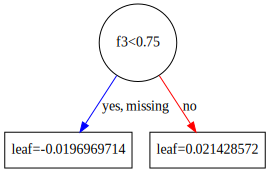

In [23]:
xgb.to_graphviz(bst, num_trees=0) # visualize the first tree

In [24]:
# bst.dump_model('./Desktop/model.txt')

In [29]:
# bst.save_model('./Desktop/0001.model')

# Importance of Features

In [25]:
ypred_contribs = bst.predict(dtest, pred_contribs=True)

In [26]:
ypred_contribs

array([[ 0.        ,  0.        , -1.0144829 , -0.4127775 ,  0.04604663],
       [ 0.        ,  0.        ,  0.96967536,  0.39522746,  0.04604663],
       [ 0.        ,  0.        , -1.0144829 , -0.4127775 ,  0.04604663],
       [ 0.        ,  0.        ,  0.96967536,  0.39522746,  0.04604663],
       [ 0.        ,  0.        ,  0.96967536,  0.39522746,  0.04604663],
       [ 0.        ,  0.        ,  0.96967536,  0.39522746,  0.04604663],
       [ 0.        ,  0.        , -1.0144829 , -0.4127775 ,  0.04604663],
       [ 0.        ,  0.        ,  0.96967536,  0.39522746,  0.04604663],
       [ 0.        ,  0.        ,  0.96967536,  0.39522746,  0.04604663],
       [ 0.        ,  0.        ,  0.96967536,  0.39522746,  0.04604663],
       [ 0.        ,  0.        ,  0.96967536,  0.39522746,  0.04604663],
       [ 0.        ,  0.        ,  0.96967536,  0.39522746,  0.04604663],
       [ 0.        ,  0.        ,  0.96967536,  0.39522746,  0.04604663],
       [ 0.        ,  0.        , -1.0

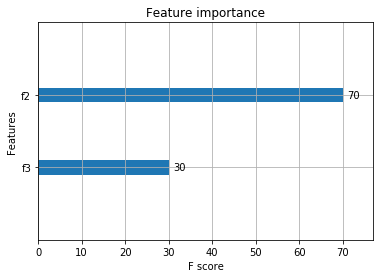

In [38]:
import matplotlib.pyplot as plt
xgb.plot_importance(bst)
plt.show()